In [129]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pickle
import json
import pandas as pd
import shutil

In [130]:
desc_path = '/home/proj01/FocusOnDepth/evaluation/eval_datasets/ADE20K_2021_17_01/'
with open(desc_path+'index_ade20k.pkl','rb') as f:
    desc = pickle.load(f)
#desc['description']
#desc['objectnames']

In [131]:
folder_path = '/home/proj01/FocusOnDepth/evaluation/eval_datasets/ADE20K_2021_17_01/images/ADE/validation'

In [132]:
folder_list = os.listdir(folder_path)
folder_list

['sports_and_leisure',
 'urban',
 'shopping_and_dining',
 'cultural',
 'work_place',
 'unclassified',
 'industrial',
 'transportation',
 'nature_landscape',
 'home_or_hotel']

In [137]:
# person 등장하는 이미지 합치기
person_data = []

for folder in folder_list:
    folder_list2 = os.listdir(folder_path+'/'+folder)
    for folder2 in folder_list2:
        file_list = os.listdir(folder_path+'/'+folder+'/'+folder2)
        for file in file_list:

            if file[-4:] =='json':
                temp = {}
                temp['name'] = file[:-5]
                temp['path'] = folder_path+'/'+folder+'/'+folder2
                temp['index'] = []
                with open(folder_path+'/'+folder+'/'+folder2+'/'+file,'rb') as f:
                    j = json.load(f)
                for ind, obj in enumerate(j['annotation']['object']):
                    for i in obj['hypernym']:
                        if 'person' in i:
                            temp['index'].append(ind)
                            break
                if len(temp['index']) !=0:
                    person_data.append(temp)
                    shutil.copyfile(folder_path+'/'+folder+'/'+folder2+'/'+temp['name']+'.jpg','/home/proj01/FocusOnDepth/evaluation/eval_datasets/new_ade/image/'+temp['name']+'.jpg')

In [128]:
#image 합치기
for i in person_data:
    path = i['path']+'/'+i['name']+'/'
    for ji, j in enumerate(i['index']):
        file_list = sorted(os.listdir(path))
        img_path = path+file_list[j]
        # 현재 있는 파일 목록에서 index에 해당하는 것 불러오는 코드로 수정
        if ji ==0:
            result = Image.open(img_path)
        else:
            image = Image.open(img_path)
            image_array = np.array(image,dtype=np.uint8)
            result = Image.fromarray(np.maximum(np.array(result,dtype=np.uint8),image_array))
    result = np.array(result, dtype=np.uint8)
    result[result == 128] = 0
    result = Image.fromarray(result)
    result.save('/home/proj01/FocusOnDepth/evaluation/eval_datasets/new_ade/segmentation/'+i['name']+'.png')


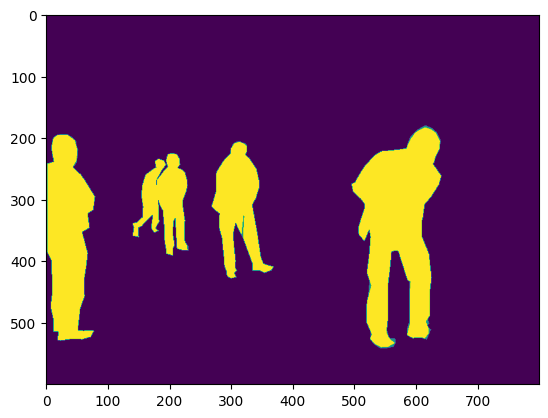

In [68]:
import matplotlib.pyplot as plt
plt.imshow(result)
plt.show()